<a href="https://colab.research.google.com/github/napsterrisen/boom/blob/main/Digits_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_________________

# Support Vector Machine Assignment





-----------





### Description  [ load_digits ]

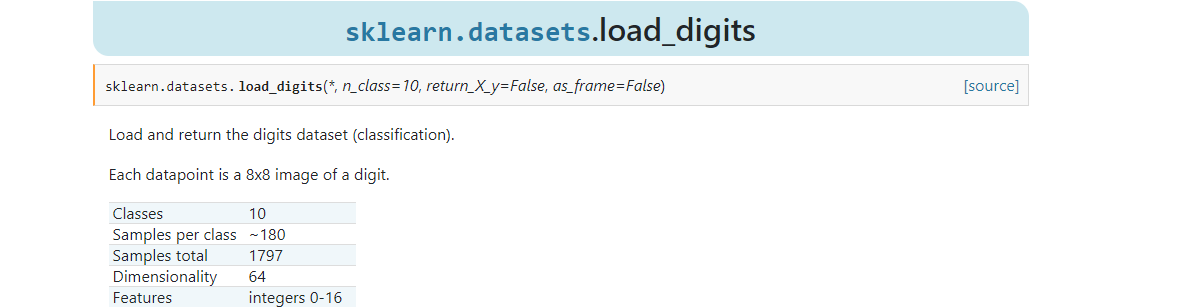

#### Reading the data from built-in datasets using sklearn module

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

In [213]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [215]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [216]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [217]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## Visualizing the digits using Matplotlib library

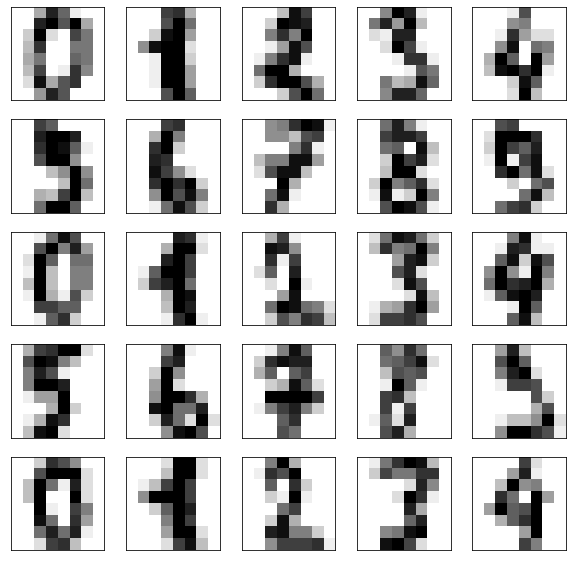

In [214]:
import math

numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

__________________________________________________

##  Scaling the data by using StandardScaler 

In [218]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dan=sc.fit_transform(digits.data)

In [219]:
dan

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

___________________________

## PCA for Dimensionality Reduction

In [220]:
from sklearn.decomposition import PCA

In [221]:
#cov = red.cov()
#eig_val, eig_vec=np.linalg.eig(cov)

In [222]:
pca=PCA(n_components=.95)
ming=pca.fit_transform(dan)
cumsum=np.cumsum(pca.explained_variance_ratio_)
np.argmax(cumsum>=0.95)+1

40

In [223]:
black=pd.DataFrame(ming)

In [224]:
black.shape

(1797, 40)

In [225]:
#black['target']=digits.target
black

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.914214,-0.954502,-3.946035,2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,-0.499693,-0.789466,0.228125,-0.195142,0.837040,0.104341,0.185323,-0.090057,0.412754,0.430517,0.450994,0.558703,0.508826,-0.758896,-0.464500,0.732176,0.327318,0.157022,0.404918,-0.324594,0.534683,-0.017979,0.047950,0.019124,0.117190,0.709049,0.082410,0.814059,0.024931,0.321931
1,0.588980,0.924636,3.924755,-1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,-0.505000,0.641593,-0.048361,-0.392054,-0.744412,-0.214072,-0.101727,-0.422000,0.553085,-0.069676,0.909818,-0.242434,-0.478472,0.491158,0.790504,0.067788,-1.525555,-0.742482,-0.855856,-0.277084,1.098196,-1.144159,0.037744,0.371680,-0.671299,-0.004144,-0.246765,0.200261,0.087108,-0.489143
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,2.196453,-2.310276,-0.566874,-0.995772,-1.170505,0.399017,-0.240298,-0.465223,-1.065556,-1.133454,-0.525917,0.069262,-1.276142,-0.389437,-0.407580,-0.121614,0.373418,0.205099,-0.362138,1.181186,-0.749792,0.487304,-1.356959,-0.107016,0.149503,-0.089290,0.408216,-0.214596,-1.278875,0.545834
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,-1.065129,0.491755,-0.166579,1.008790,-0.141893,-1.000781,-0.950687,-0.400034,1.490825,0.308128,0.560421,-0.167976,0.573332,-0.532997,-0.084318,-0.466793,0.154232,-0.403244,0.291934,-1.244539,0.268599,0.875580,0.117581,-0.470575,-0.148854,0.234044,0.396726,0.197436,0.772751,-0.050325
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,-1.017440,-1.365994,-0.343716,-0.113469,0.732635,0.210692,-0.094411,-0.552371,1.613976,1.086368,0.495644,-0.185698,0.960864,-0.184642,0.563999,-2.142481,0.064456,0.746668,1.076306,0.297665,-0.660454,-0.360253,0.268121,0.499444,-0.263106,-0.583008,-0.174328,-0.215579,-0.133426,0.184994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255024,-3.765861,-1.947006,-0.190094,-0.555760,0.531222,0.476475,1.152430,-0.473054,-0.635879,0.803622,1.205195,-0.700724,0.187246,0.161669,0.504438,0.357642,-0.956725,0.816109,0.030250,-0.783514,-0.676671,-0.042743,-0.359572,-0.066849,0.203868,0.058615,0.979933,-0.122796,-0.430137,-0.515627,-0.311117,0.421468,0.392554,0.420797,0.541567,-0.024422,-0.756333,-0.285562
1793,2.423234,-1.429611,-3.045245,2.632089,-0.822902,0.004061,-1.106872,2.330903,0.569455,-1.654173,-0.460155,-0.530551,0.858305,0.885069,-0.702222,1.098425,0.301699,-0.311522,-0.307535,0.110083,-0.957759,-0.041950,0.379564,0.082078,0.213136,-0.864603,0.272784,-0.567033,-0.769823,-0.008326,-0.047497,-0.131434,-0.194507,0.054860,-0.169494,-0.023170,-0.162096,-0.506573,-0.061084,-0.404112
1794,1.022596,-0.147911,2.469974,-0.620307,-0.972043,-0.007377,0.381115,0.529064,2.054709,-2.036838,-0.679554,0.396803,-0.409313,0.257614,0.334953,1.162071,1.124031,0.669245,-1.612100,0.182303,0.166667,-0.237439,0.041549,0.235181,-0.261485,-1.340361,-0.054225,-0.352066,0.521824,-0.271170,-0.947936,-0.152536,0.050913,0.595505,1.019822,0.134728,-0.543296,0.601365,0.412388,1.208864
1795,1.076055,-0.380906,-2.455487,-1.312013,0.253533,-0.638322,1.034470,0.763325,1.077474,-0.334527,-0.980131,0.606451,0.169573,-0.759176,0.014572,0.158465,1.686638,0.811822,-1.769181,0.774718,-0.135668,-0.433929,1.111662,0.312411,-0.940159,1.152000,-0.662983,0.979041,0.293561,-0.711736,0.176904,-0.446737,-0.468408,0.160652,-0.771848,0.576100,0.429805,0.437566,-0.698635,-0.443400


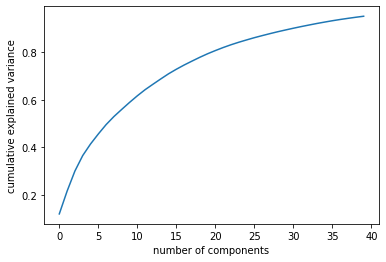

In [226]:
plt.plot(cumsum)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

__________________________________________________

## Training the model Using Support Vector Machine (SVM)

In [227]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [256]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
%matplotlib inline

In [229]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
scores = []

for kernel in kernels:
    print("------> Building model for {} kernel".format(kernel))
    model = make_pipeline( SVC(kernel=kernel,C=2, random_state=20))
    model_scores = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')
    print(": Accuracy scores {}".format(model_scores))
    scores.append(model_scores.mean())
    del model

------> Building model for linear kernel
: Accuracy scores [0.96388889 0.91944444 0.96657382 0.9637883  0.92479109]
------> Building model for poly kernel
: Accuracy scores [0.98333333 0.94722222 0.98050139 0.98885794 0.94707521]
------> Building model for rbf kernel
: Accuracy scores [0.98055556 0.94722222 0.98328691 0.98885794 0.95264624]
------> Building model for sigmoid kernel
: Accuracy scores [0.85277778 0.79166667 0.86908078 0.8913649  0.81337047]


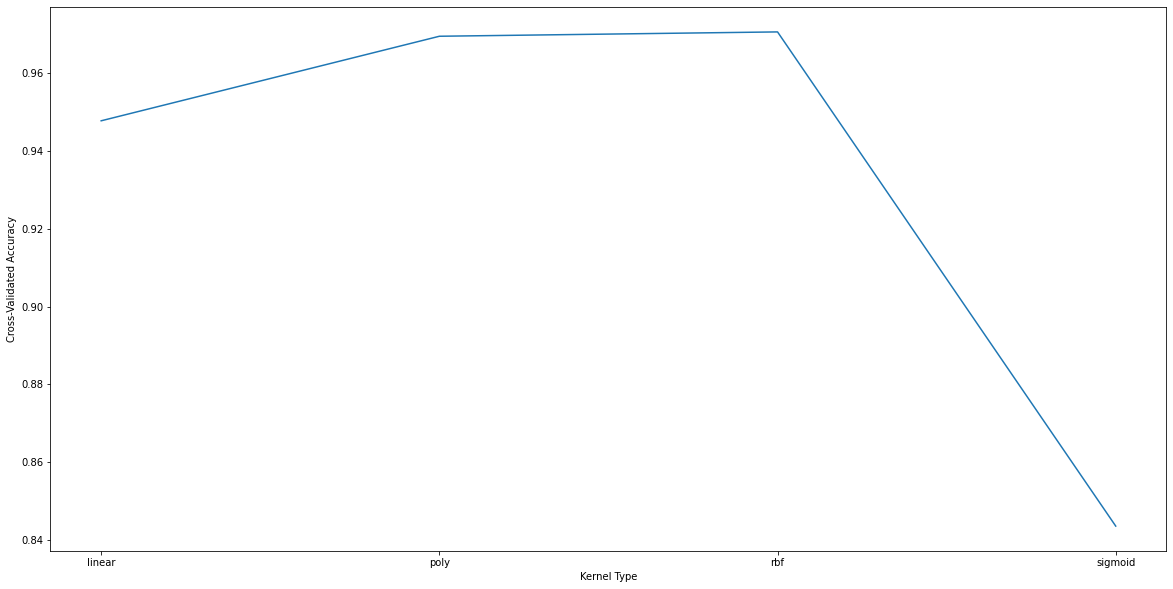

In [230]:
plt.figure(figsize=(20,10))
plt.plot(kernels, scores)

plt.xlabel('Kernel Type')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [232]:
len(X_train)

1437

In [233]:
len(X_test)

360

In [234]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')

In [235]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [236]:
pre=model.predict(X_test)
pre.shape

(360,)

In [237]:
y_test.shape

(360,)

In [238]:
model.score(X_test,y_test)

0.9944444444444445

In [239]:
from sklearn.metrics import accuracy_score,r2_score,classification_report
accuracy_score(y_test,pre)

0.9944444444444445

In [240]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        35
           5       1.00      0.97      0.99        34
           6       0.98      1.00      0.99        42
           7       1.00      1.00      1.00        49
           8       1.00      0.97      0.99        39
           9       1.00      1.00      1.00        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [241]:
r2_score(y_test,pre)

0.9826260025037861

**Tune parameters**

**1. Regularization (C)**

In [242]:
mode=range(1,10)
scores=[]
for m in mode:
    mod= SVC(C=m)
    mod.fit(X_train, y_train)
    score=mod.score(X_test, y_test)
    print(": Accuracy scores for C = {}".format(m), "is {}".format(score))
    scores.append(score*100)
    del mod

: Accuracy scores for C = 1 is 0.9944444444444445
: Accuracy scores for C = 2 is 0.9972222222222222
: Accuracy scores for C = 3 is 0.9972222222222222
: Accuracy scores for C = 4 is 0.9972222222222222
: Accuracy scores for C = 5 is 0.9972222222222222
: Accuracy scores for C = 6 is 0.9972222222222222
: Accuracy scores for C = 7 is 0.9972222222222222
: Accuracy scores for C = 8 is 0.9972222222222222
: Accuracy scores for C = 9 is 0.9972222222222222


Hence, we can give the C value as [2] for getting the most robu. 

In [243]:
model_C = SVC(C=2)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9972222222222222

**2. Gamma**

For a linear kernel, we just need to optimize the c parameter. However, if we want to use an RBF kernel, both c and gamma parameter need to optimized simultaneously. If gamma is large, the effect of c becomes negligible. If gamma is small, c affects the model just like how it affects a linear model.

In [246]:
gamma=['scale','auto']
scores=[]
for g in gamma:
    mod= SVC(kernel='rbf',gamma=g)
    mod.fit(X_train, y_train)
    score=mod.score(X_test, y_test)
    print(": Accuracy scores for Gamma value = ['{}']".format(g), "is {}".format(score))
    scores.append(score*100)
    del mod

: Accuracy scores for Gamma value = ['scale'] is 0.9944444444444445
: Accuracy scores for Gamma value = ['auto'] is 0.4388888888888889


In [249]:
model_g = SVC(kernel='rbf',gamma=.003)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9916666666666667

**3. Kernel**

In [254]:
model_linear_kernal = SVC(kernel='linear',C=2)
model_linear_kernal.fit(X_train, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [255]:
model_linear_kernal.score(X_test, y_test)

0.9833333333333333